# In this code I have predicted whether a person can have diabetes or not according to certain given features. Data Set used: Pima-Indians-Diabetes Dataset.

In [148]:
import pandas as pd

In [149]:
diabetes=pd.read_csv('pima-indians-diabetes.csv')

In [150]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [151]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [152]:
cols_to_norm=['Number_pregnant', 'Glucose_concentration',
              'Blood_pressure', 'Triceps', 'Insulin', 'BMI', 
              'Pedigree'] 

### Cleaning the data- Normalizing except Age, Group and Class

In [153]:
diabetes[cols_to_norm]=diabetes[cols_to_norm].apply(lambda x: 
                        (x-x.min())/(x.max()-x.min()))

In [154]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [155]:
import tensorflow as tf

In [156]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [157]:
num_preg = tf.feature_column.numeric_column('Number_pregnant')
plasma_gluc = tf.feature_column.numeric_column('Glucose_concentration')
dias_press = tf.feature_column.numeric_column('Blood_pressure')
tricep = tf.feature_column.numeric_column('Triceps')
insulin = tf.feature_column.numeric_column('Insulin')
bmi = tf.feature_column.numeric_column('BMI')
diabetes_pedigree = tf.feature_column.numeric_column('Pedigree')
age = tf.feature_column.numeric_column('Age')

In [158]:
#assigned_group=tf.feature_column.categorical_column_with_vocabulary_list(
 #                 'Group',['A','B','C','D'])

In [159]:
assigned_group=tf.feature_column.categorical_column_with_hash_bucket(
                     'Group',hash_bucket_size=10)

In [160]:
import matplotlib.pyplot as plt
%matplotlib inline

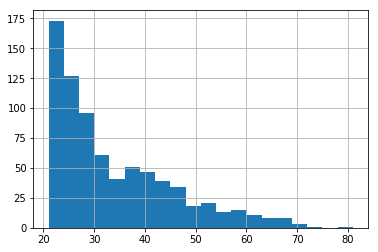

In [161]:
diabetes['Age'].hist(bins=20)

In [162]:
age_bucket=tf.feature_column.bucketized_column(age,boundaries=[20,
                                30,40,50,60,70,80])

In [163]:
feat_cols=[num_preg,plasma_gluc,dias_press,tricep,insulin,
           bmi,diabetes_pedigree,assigned_group,age_bucket]

In [164]:
from sklearn.model_selection import train_test_split

In [165]:
x_data=diabetes.drop('Class',axis=1)

In [166]:
x_data.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,C


In [167]:
labels=diabetes['Class']
x_train,x_test,y_train,y_test=train_test_split(
    x_data,labels,test_size=0.3,random_state=101)

In [168]:
input_func=tf.estimator.inputs.pandas_input_fn(
    x=x_train,y=y_train,batch_size=10, num_epochs=1000,
shuffle=True)

In [169]:
model=tf.estimator.LinearClassifier(
    feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_tf_random_seed': 1, '_keep_checkpoint_max': 5, '_log_step_count_steps': 100, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': '/tmp/tmphodk5kvj', '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_save_summary_steps': 100}


In [170]:
model.train(input_func,steps=1000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/tmphodk5kvj/model.ckpt.
INFO:tensorflow:loss = 6.931472, step = 1
INFO:tensorflow:global_step/sec: 129.3
INFO:tensorflow:loss = 4.2074966, step = 101 (0.780 sec)
INFO:tensorflow:global_step/sec: 142.906
INFO:tensorflow:loss = 5.6077294, step = 201 (0.701 sec)
INFO:tensorflow:global_step/sec: 146.794
INFO:tensorflow:loss = 6.3181257, step = 301 (0.681 sec)
INFO:tensorflow:global_step/sec: 134.794
INFO:tensorflow:loss = 4.595928, step = 401 (0.742 sec)
INFO:tensorflow:global_step/sec: 140.94
INFO:tensorflow:loss = 4.604857, step = 501 (0.705 sec)
INFO:tensorflow:global_step/sec: 140.932
INFO:tensorflow:loss = 4.9281616, step = 601 (0.720 sec)
INFO:tensorflow:global_step/sec: 139.781
INFO:tensorflow:loss = 5.7758617, step = 701 (0.710 sec)
INFO:tensorflow:global_step/sec: 140.253
INFO:tensorflow:loss = 6.0069985, step = 801 (0.707 sec)
INFO:tensorflow:global_step/sec: 106.633
INFO:tensorflow:los

In [171]:
eval_input_func=tf.estimator.inputs.pandas_input_fn(
    x=x_test,y=y_test,batch_size=10,num_epochs=1,shuffle=False)

In [172]:
results=model.evaluate(eval_input_func)

INFO:tensorflow:Starting evaluation at 2020-03-23-13:47:06
INFO:tensorflow:Restoring parameters from /tmp/tmphodk5kvj/model.ckpt-1000
INFO:tensorflow:Finished evaluation at 2020-03-23-13:47:07
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.74458873, accuracy_baseline = 0.64935064, auc = 0.8032098, auc_precision_recall = 0.64439595, average_loss = 0.530071, global_step = 1000, label/mean = 0.35064936, loss = 5.1019335, prediction/mean = 0.38828894


In [173]:
results

{'accuracy': 0.74458873,
 'accuracy_baseline': 0.64935064,
 'auc': 0.8032098,
 'auc_precision_recall': 0.64439595,
 'average_loss': 0.530071,
 'global_step': 1000,
 'label/mean': 0.35064936,
 'loss': 5.1019335,
 'prediction/mean': 0.38828894}

In [174]:
pred_input_func=tf.estimator.inputs.pandas_input_fn(
x=x_test,batch_size=10,num_epochs=1,shuffle=False)

In [175]:
predictions=model.predict(pred_input_func)

In [176]:
my_pred=list(predictions)

INFO:tensorflow:Restoring parameters from /tmp/tmphodk5kvj/model.ckpt-1000


In [177]:
my_pred

[{'class_ids': array([1]),
  'classes': array([b'1'], dtype=object),
  'logistic': array([0.54765236], dtype=float32),
  'logits': array([0.19118983], dtype=float32),
  'probabilities': array([0.45234758, 0.54765236], dtype=float32)},
 {'class_ids': array([1]),
  'classes': array([b'1'], dtype=object),
  'logistic': array([0.6455812], dtype=float32),
  'logits': array([0.5996718], dtype=float32),
  'probabilities': array([0.35441878, 0.6455812 ], dtype=float32)},
 {'class_ids': array([0]),
  'classes': array([b'0'], dtype=object),
  'logistic': array([0.38391268], dtype=float32),
  'logits': array([-0.4729736], dtype=float32),
  'probabilities': array([0.6160873 , 0.38391268], dtype=float32)},
 {'class_ids': array([0]),
  'classes': array([b'0'], dtype=object),
  'logistic': array([0.394512], dtype=float32),
  'logits': array([-0.4283852], dtype=float32),
  'probabilities': array([0.60548806, 0.39451203], dtype=float32)},
 {'class_ids': array([0]),
  'classes': array([b'0'], dtype=obje

### Till here I have done simply with a normal Regression model. Now to increase my accuracy I will use Dense Neural Networks

In [178]:
dnn_model=tf.estimator.DNNClassifier(
    feature_columns=feat_cols,n_classes=2,hidden_units=[10,10,10])

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_tf_random_seed': 1, '_keep_checkpoint_max': 5, '_log_step_count_steps': 100, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': '/tmp/tmpdq1xdtap', '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_save_summary_steps': 100}


In [179]:
embedded_group_col=tf.feature_column.embedding_column(
    assigned_group,dimension=4)

In [180]:
feat_cols=[num_preg,plasma_gluc,dias_press,tricep,insulin,
           bmi,diabetes_pedigree,embedded_group_col,age_bucket]

In [181]:
input_func=tf.estimator.inputs.pandas_input_fn(
    x_train,y_train,batch_size=10,num_epochs=1000,shuffle=True)

In [189]:
dnn_model=tf.estimator.DNNClassifier(
    feature_columns=feat_cols,n_classes=2,
    hidden_units=[10,20,20,10,10])

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_tf_random_seed': 1, '_keep_checkpoint_max': 5, '_log_step_count_steps': 100, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': '/tmp/tmpvj6slhw9', '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_save_summary_steps': 100}


In [190]:
dnn_model.train(input_func,steps=1000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/tmpvj6slhw9/model.ckpt.
INFO:tensorflow:loss = 6.9635134, step = 1
INFO:tensorflow:global_step/sec: 115.299
INFO:tensorflow:loss = 4.217804, step = 101 (0.874 sec)
INFO:tensorflow:global_step/sec: 142.852
INFO:tensorflow:loss = 6.225733, step = 201 (0.700 sec)
INFO:tensorflow:global_step/sec: 128.634
INFO:tensorflow:loss = 7.1352363, step = 301 (0.784 sec)
INFO:tensorflow:global_step/sec: 133.835
INFO:tensorflow:loss = 5.0507627, step = 401 (0.738 sec)
INFO:tensorflow:global_step/sec: 98.8372
INFO:tensorflow:loss = 3.0854177, step = 501 (1.022 sec)
INFO:tensorflow:global_step/sec: 139.28
INFO:tensorflow:loss = 4.113411, step = 601 (0.711 sec)
INFO:tensorflow:global_step/sec: 141.734
INFO:tensorflow:loss = 4.7584243, step = 701 (0.705 sec)
INFO:tensorflow:global_step/sec: 144.662
INFO:tensorflow:loss = 3.9073696, step = 801 (0.691 sec)
INFO:tensorflow:global_step/sec: 143.935
INFO:tensorflow:l

In [191]:
eval_input_func=tf.estimator.inputs.pandas_input_fn(
    x=x_test,y=y_test,batch_size=10,num_epochs=1,shuffle=False)

In [192]:
dnn_model.evaluate(eval_input_func)

INFO:tensorflow:Starting evaluation at 2020-03-23-13:49:40
INFO:tensorflow:Restoring parameters from /tmp/tmpvj6slhw9/model.ckpt-1000
INFO:tensorflow:Finished evaluation at 2020-03-23-13:49:41
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.77056277, accuracy_baseline = 0.64935064, auc = 0.82543206, auc_precision_recall = 0.68778956, average_loss = 0.5044185, global_step = 1000, label/mean = 0.35064936, loss = 4.8550277, prediction/mean = 0.29609022


{'accuracy': 0.77056277,
 'accuracy_baseline': 0.64935064,
 'auc': 0.82543206,
 'auc_precision_recall': 0.68778956,
 'average_loss': 0.5044185,
 'global_step': 1000,
 'label/mean': 0.35064936,
 'loss': 4.8550277,
 'prediction/mean': 0.29609022}

## First Model Accuracy:74.45%, 2nd model: 77.06%.